### Importing libraries

In [1]:
import pandas as pd
import  numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

### Read Train and Test .csv data  and printing sample data

In [2]:
train_df = pd.read_csv("/home/becode/clones/ANT-Theano-1-21 (copy)/03.Machine_Learning/learnskt/kaggle/titanic/train.csv")

print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
test_df = pd.read_csv("/home/becode/clones/ANT-Theano-1-21 (copy)/03.Machine_Learning/learnskt/kaggle/titanic/test.csv")

print(test_df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


### Checking for null values in Train data

In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Percent of missing Age data

In [5]:
print('Percent of missing Age records is %.2f%%'%((train_df['Age'].isnull().sum()/train_df.shape[0])*100))


Percent of missing Age records is 19.87%


In [6]:
# Approx 20% Age data is missing

# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))

# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


### Age variable distribution

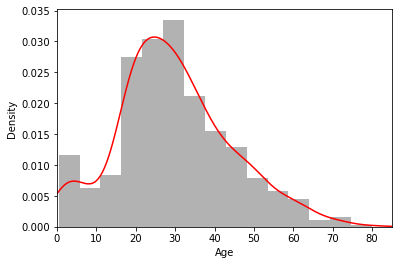

In [7]:
# Plotting histogram for Age variable distribution

agx = train_df["Age"].hist(bins=15, density=True, stacked=True, color='grey', alpha=0.6)

train_df["Age"].plot(kind='density', color='red')

agx.set(xlabel='Age')

plt.xlim(0,85)

plt.show()

### Fare variable distribution 

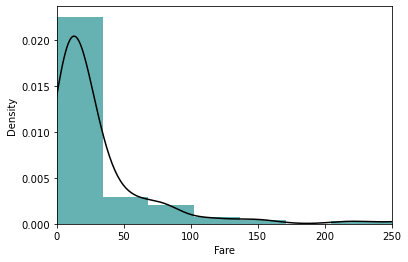

In [8]:
# Ploting a histogram for distribution of Fare variable in data

prx = train_df["Fare"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)

train_df["Fare"].plot(kind='density', color='black')

prx.set(xlabel='Fare')

plt.xlim(0,250)

plt.show()

In [9]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [10]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


In [11]:
# Most Embarked port 
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


### Adjustment in data based on missing data in 'Age', 'Cabin' and 'Embarked' 

In [12]:

# We will do adjustment only in 'Age' and 'Embarked' variables  as missing data of 'Cabin' variable is too high so we gonna drop that

# making a copy of data to do all changes so our original data remains safe
train_data = train_df.copy()

# for 'Age' variable filling all the missing data with median of Age as we saw in Age distribution plot
train_data["Age"].fillna(train_df['Age'].median(skipna= True), inplace = True)

# for Embarked filling all the missing data with most boarded port
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace = True)

# droping cabin data as it has high value to missing data
train_data.drop('Cabin', axis= 1 , inplace = True)

In [13]:
#check whether all missing data replaced or not
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
#Create Categorical variable for traveling with family
#numpy.where(condition[, x, y]) if condition is true it yields x else y
# in our case if someone is travelling alone its '1' and if with family its '0' 

train_data['WithFamily'] = np.where((train_data['SibSp'] + train_data['Parch'])> 0, 0,1 )

#droping the SibSp and Parch from data

train_data.drop('SibSp', axis = 1, inplace = True)

train_data.drop('Parch', axis = 1, inplace = True)

In [16]:
#checking new data

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,WithFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [17]:
# Creating Categorical variable for Sex, Pclass and Embarked
#pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

train_data = pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'Embarked'])

In [18]:
# droping of extra columns as Sex has only two variable so droping one

train_data.drop('Sex_male', axis = 1, inplace = True)

train_data.head()


,PassengerId,Survived,Name,Age,Ticket,Fare,WithFamily,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,1,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,1,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,0,1,0,0,0,1


## Exploring relation of different variable with Survival-------->

### Checking relation between Age and Survived/Died by ploting

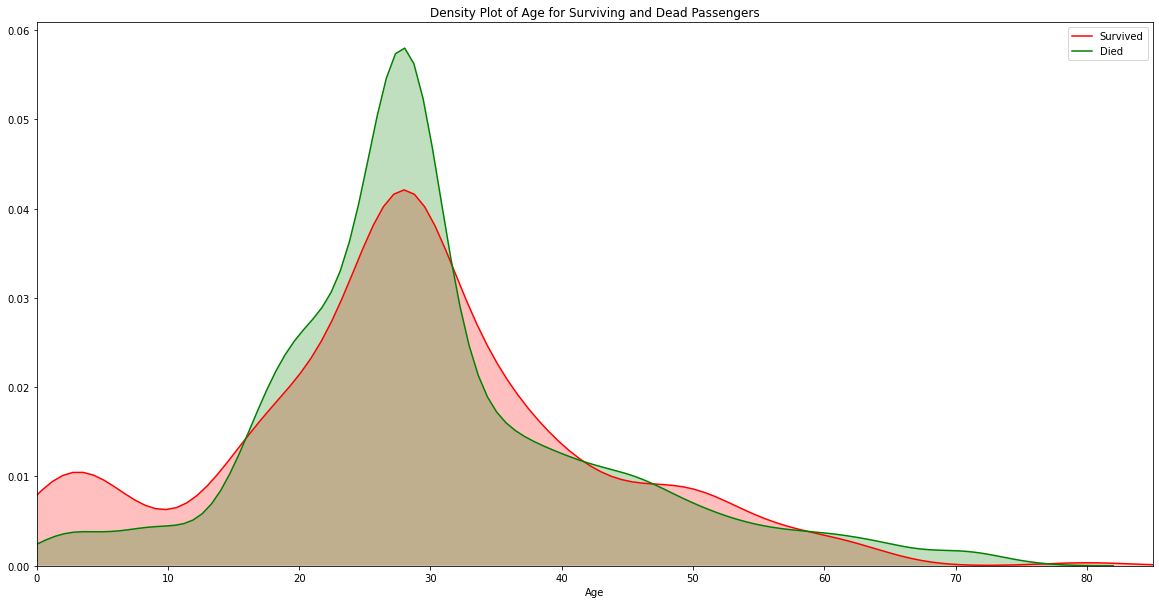

In [19]:
# plotting a kdeplot for visualizing the impact of variable 'Age' on 'Survival'

plt.figure(figsize= (20,10))

ax = sns.kdeplot(train_data['Age'][train_data.Survived == 1], color='red' , shade = True)

sns.kdeplot(train_data['Age'][train_data.Survived == 0], color='green' , shade = True)

plt.legend(['Survived', 'Died'])

plt.title('Density Plot of Age for Surviving and Dead Passengers')

ax.set(xlabel='Age')

plt.xlim(0,85)

plt.show()


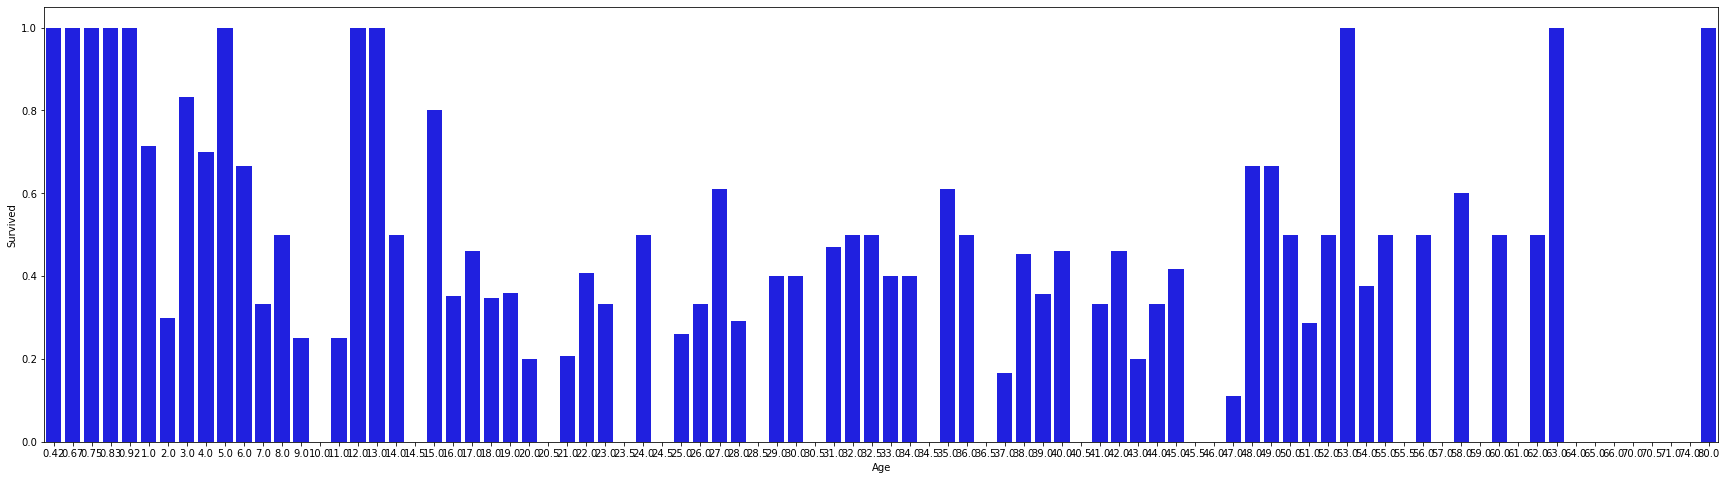

In [20]:
# 'Age' distribution for survivors and deceased is almost same except for childrens so plotting bar graph for calculating a range

plt.figure(figsize = (30,8))

avg_survival_age = train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()

sns.barplot(x = 'Age', y = 'Survived', data = avg_survival_age, color = 'blue')

plt.show()

In [21]:
# from above bar chart we got that if age is below 15 chances of survival is high so we can add it as variable
# 'Below15'

train_data['Below15'] = np.where (train_data['Age'] < 15, 1, 0 )

train_data.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,WithFamily,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Below15
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,0,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,1,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,1,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,0,1,0,0,0,1,0


### Checking relation between Fare and Survived/Died by ploting

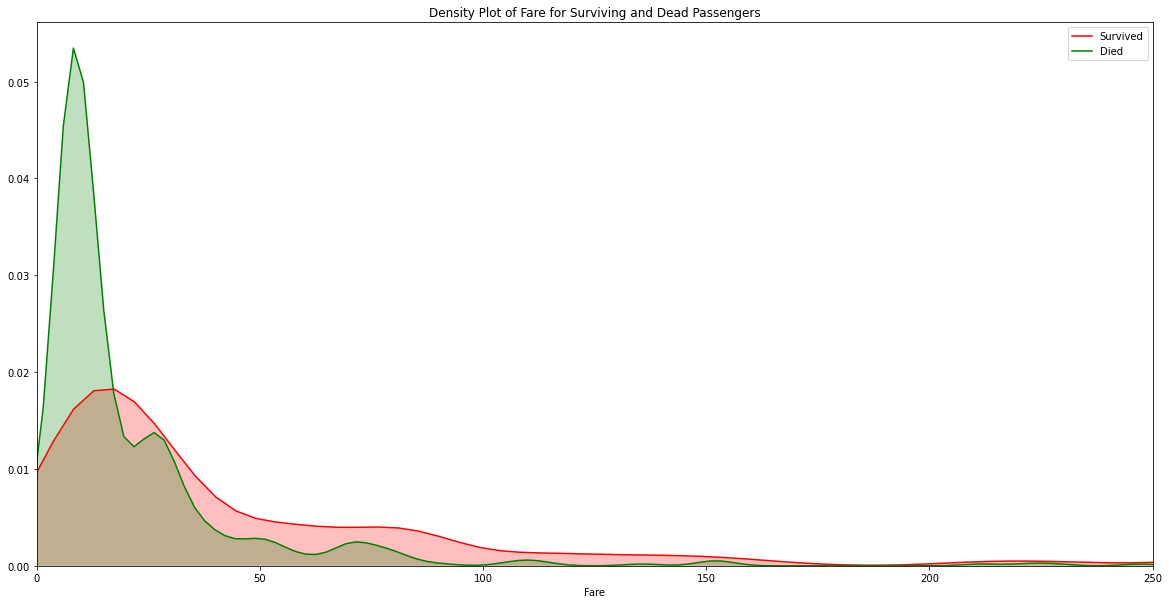

'\nPlot clearly shows that a person payed more fare is likely to survive than a person who payed less \n'

In [22]:
# plotting a kdeplot for visualizing the impact of variable 'Fare' on 'Survival'

plt.figure(figsize= (20,10))

ax = sns.kdeplot(train_data['Fare'][train_data.Survived == 1], color='red' , shade = True)

sns.kdeplot(train_data['Fare'][train_data.Survived == 0], color='green' , shade = True)

plt.legend(['Survived', 'Died'])

plt.title('Density Plot of Fare for Surviving and Dead Passengers')

ax.set(xlabel='Fare')

plt.xlim(0,250)

plt.show()

'''
Plot clearly shows that a person payed more fare is likely to survive than a person who payed less 
'''

### Checking relation between Pclass and Survived/Died by ploting

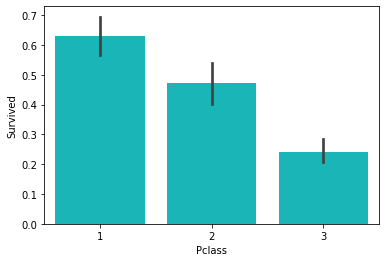

'\nPlot clearly shows that a person in higher class has more chances of survival\n'

In [23]:
# plotting a Barplot for visualizing the impact of variable 'Pclass' on 'Survival'

sns.barplot('Pclass', 'Survived', data=train_df, color="darkturquoise")

plt.show()

'''
Plot clearly shows that a person in higher class has more chances of survival
'''

### Travelling WithFamily  vs survival

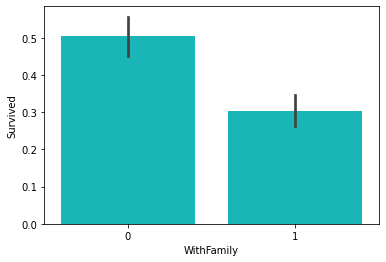

'\nPerson travelling alone are more tend to die than with family\n'

In [24]:
# plotting a kdeplot for visualizing the impact of variable 'WithFamily' on 'Survival'

sns.barplot('WithFamily', 'Survived', data=train_data, color="darkturquoise")

plt.show()

'''
Person travelling alone are more tend to die than with family
'''

### Gender impact on survival

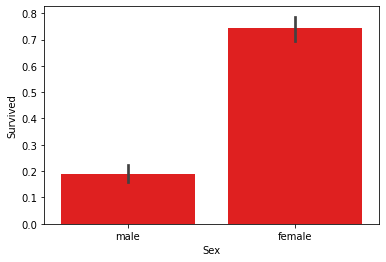

'\nFemale are moe tend to survive than male pessangers\n'

In [25]:
# plotting a Barplot for visualizing the impact of variable 'Sex' on 'Survival'

sns.barplot('Sex', 'Survived', data=train_df, color="red")

plt.show()

'''
Female are moe tend to survive than male pessangers
'''

In [26]:
cols = ["Age","Fare","WithFamily","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_female","Below15"] 

X = train_data[cols]
y = train_data['Survived']


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

## Decision Tree classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score


#creating Decision Tree classifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X,y)

# Predict the response for the test data
y_pred = clf.predict(X_test)

# Model accuracy 
print ("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9803921568627451


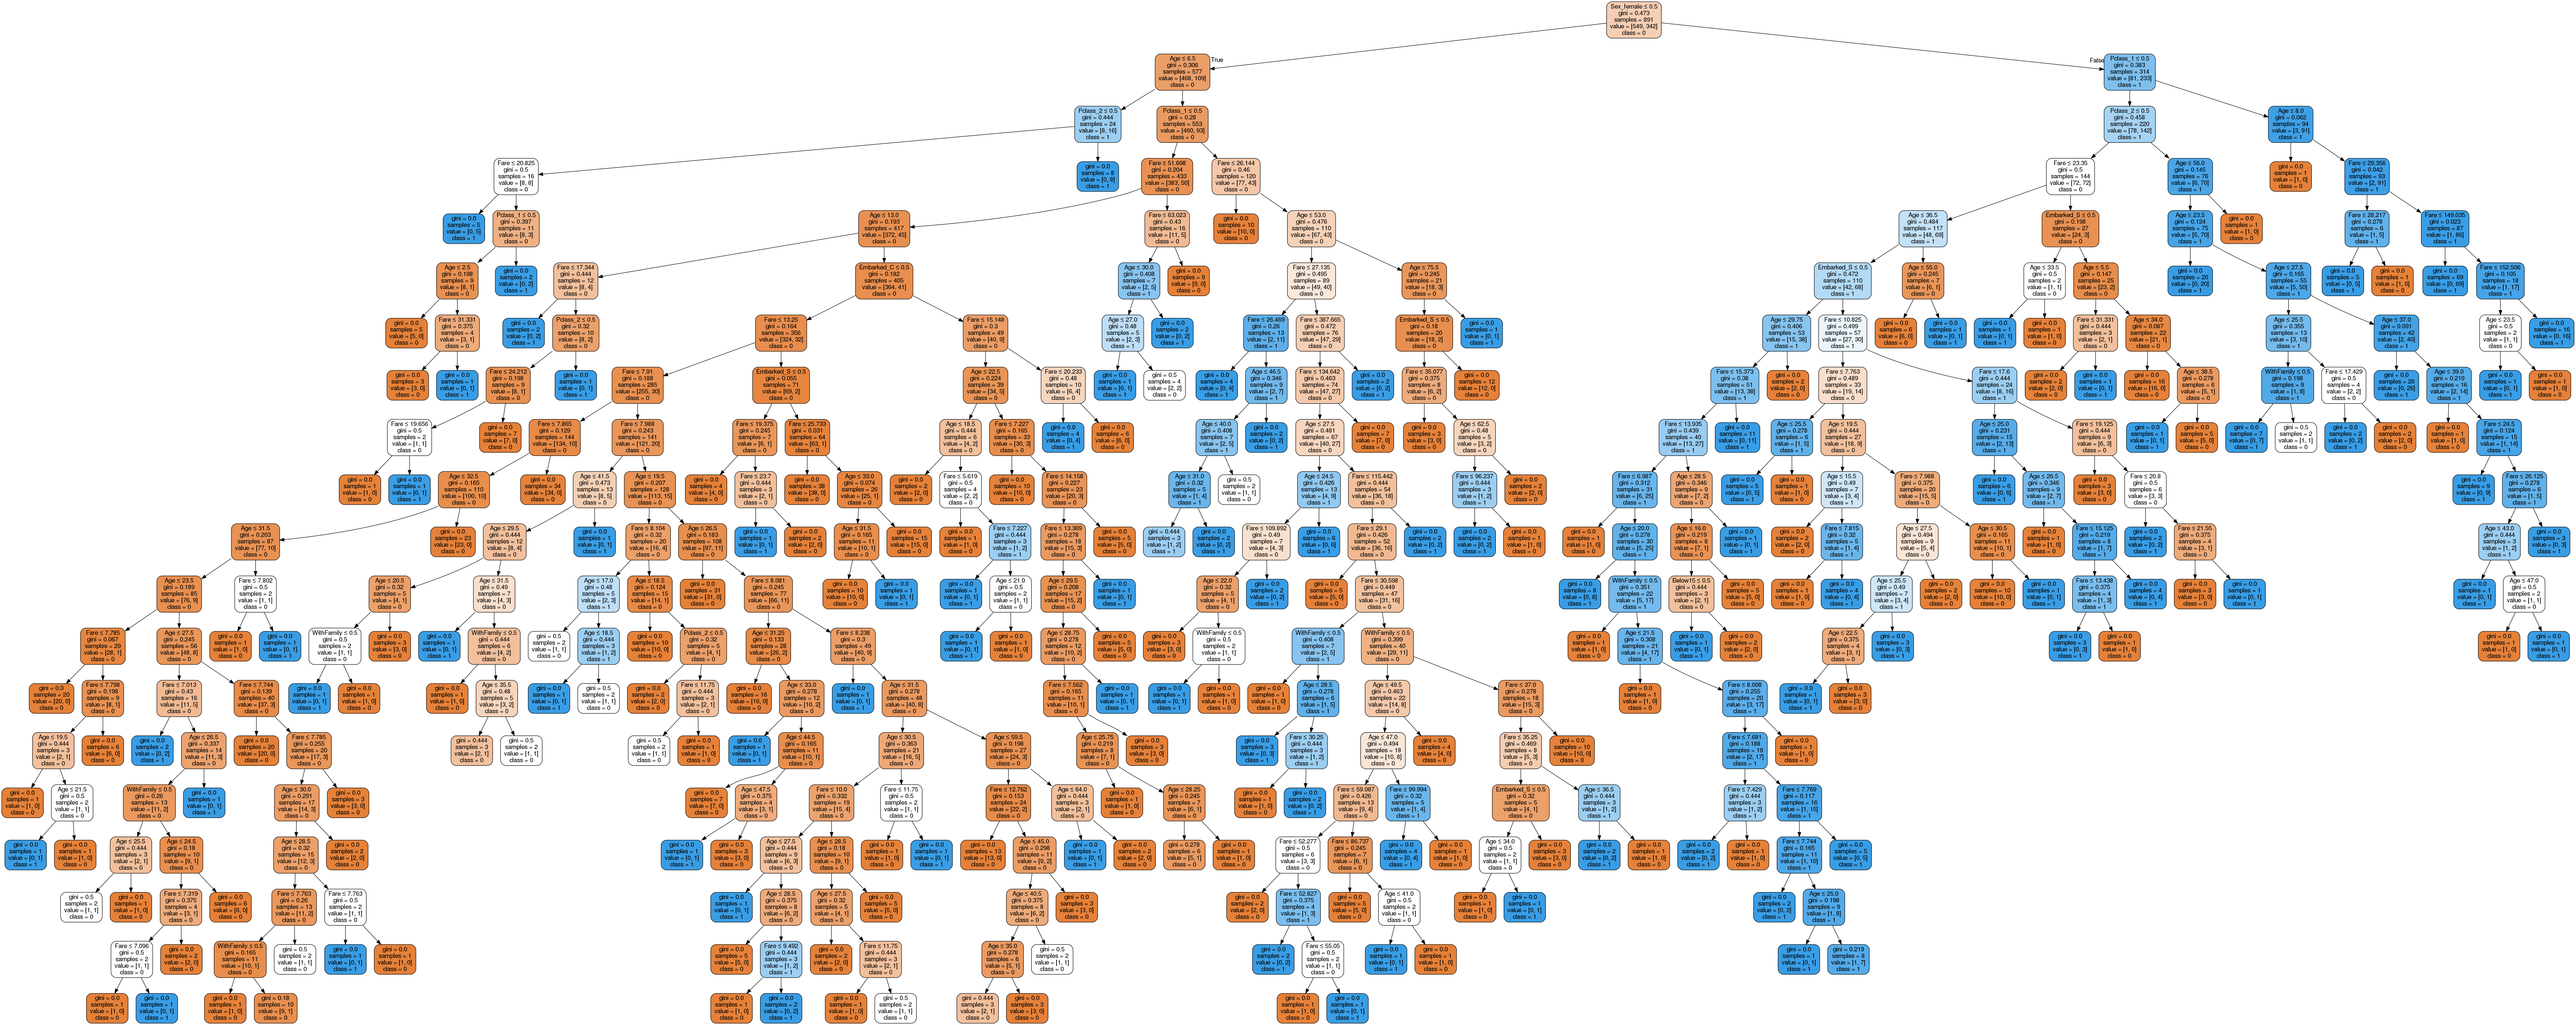

In [30]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Titanic.png')
Image(graph.create_png())